In [2]:
import pandas as pd
df = pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1



# Steps

0. Preprocess + EDA + Feature Selection
1. Extract input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evaluate the model/model selection
6. Deploy the model

In [3]:
# check if null  exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df = df.iloc[:,1:]  #rows all, col after 1
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


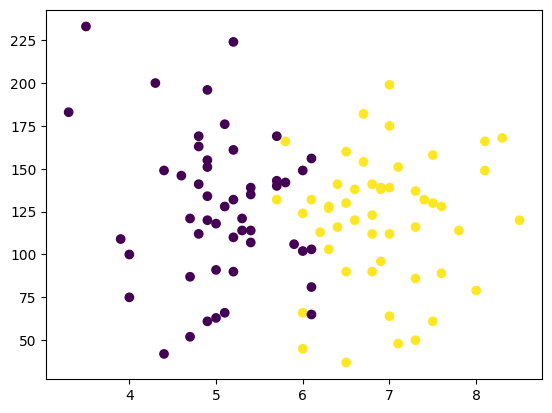

In [7]:
# EDA : give idea which algo might be best
import matplotlib.pyplot as plt  
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])  # color to know whose placement done

In [8]:
# use logistic regression that divide data into two regions
# Extract i/p and o/p columns
# X independent var
X = df.iloc[:,0:2] #need col 0 and 1
Y = df.iloc[:,-1] #last col

In [9]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [10]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [29]:
# Train the split
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1) #arg: independent var, dep var, 90% as training , 10% as test
X_train

,cgpa,iq
75,4.8,169.0
27,6.0,124.0
47,5.2,161.0
96,4.4,42.0
67,5.0,118.0
...,...,...
17,3.3,183.0
7,5.0,63.0
62,6.0,102.0
83,7.5,130.0


In [23]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.76414124,  0.91779603],
       [ 0.41378399,  0.89238795],
       [ 1.86353813,  1.04483639],
       [-0.76414124, -0.37801565],
       [-0.03926417, -1.49597082],
       [-1.21718941, -0.96240131],
       [ 0.05134546, -0.55587215],
       [ 0.50439363,  0.33341037],
       [-0.03926417, -0.58128023],
       [-0.58292198, -0.27638336],
       [-0.94536051, -0.17475107],
       [-1.12657978,  0.96861217],
       [-0.76414124, -0.88617709],
       [ 0.86683216, -1.54678696],
       [ 1.86353813,  0.61289916],
       [-1.03597015,  1.80707855],
       [-1.12657978, -0.32719951],
       [ 0.05134546, -1.52137889],
       [ 0.32317436,  0.40963458],
       [-0.31109308,  0.46045073],
       [-0.03926417,  0.61289916],
       [-1.85145685, -0.63209637],
       [-1.12657978,  1.1210606 ],
       [ 2.22597667, -0.12393493],
       [ 0.86683216,  1.88330276],
       [ 0.59500326,  1.45136554],
       [-1.48901831, -2.10576455],
       [ 0.14195509, -0.30179143],
       [ 0.86683216,

In [31]:
X_test = scaler.transform(X_test)
X_test

array([[  5.9, 106. ],
       [  7. ,  64. ],
       [  4.9, 155. ],
       [  4.9, 196. ],
       [  6.4, 116. ],
       [  6.5, 160. ],
       [  6.1, 103. ],
       [  5.4, 135. ],
       [  6.5,  90. ],
       [  5.2, 132. ]])

In [32]:
from sklearn.linear_model import  LogisticRegression 
clf = LogisticRegression()

In [33]:
# model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [37]:
# Evaluate
y_pred = clf.predict(X_test)
y_pred

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [36]:
Y_test

1     0
64    1
76    0
80    0
13    1
38    1
14    0
49    0
79    1
19    0
Name: placement, dtype: int64

In [43]:
from sklearn.metrics import accuracy_score

print(f"{accuracy_score(Y_test,y_pred) * 100}%")

90.0%


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

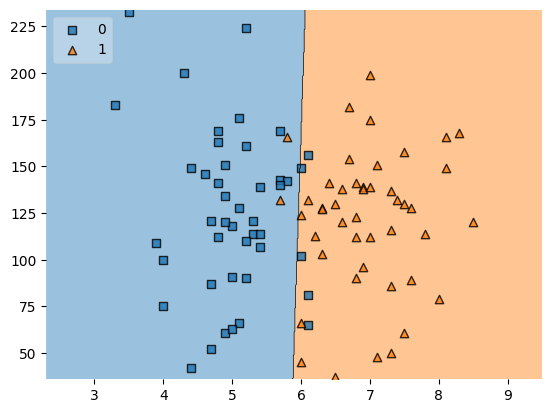

In [50]:
# from net to show visual
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train.values,Y_train.values,clf = clf,legend=2)

In [51]:
# get file which contain our predictor
import pickle
pickle.dump(clf,open('model.pkl','wb'))